# Notes

This notebook inspects the data in diabetes_012_health_indicators_BRFSS2015.csv

It gives a high level description of the data and visualises the distribution of each feature

It runs a decision tree on the data split into test and train data

The results show the decision tree does not perform well in the out of sample data

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Data Locations:

In [4]:
dataroot = Path("/Users/darja/Desktop/University23_24/1semester/MODULE_IN3062_Introduction_to_Artificial_Intelligence/coursework/archive_dataset_we_using")
file1 = "diabetes_012_health_indicators_BRFSS2015.csv"  # 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes
file2 = "diabetes_binary_health_indicators_BRFSS2015.csv"  # 0 is for no diabetes, and 1 is for prediabetes or diabetes
file3 = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv" #  0 is for no diabetes, and 1 is for prediabetes or diabetes. balanced

## Load the data

In [5]:
data_1 = pd.read_csv(dataroot / file1)
data_2 = pd.read_csv(dataroot / file2)
data_3 = pd.read_csv(dataroot / file3)

# Data Description

We have data with 22 columns.
- The columns are all potential predictors of a persons diabetes status.
- The status consists of 3 possibilities: 0 (no diabetes), 1 (pre diabetic), 2 (has diabetes)

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
# name the dependent variable or target
dependent_variable = "Diabetes_012"

The data types consist of two main feature types: binary (0 or 1 -> yes or no), and continuous values (e.g BMI)

In [9]:
data_1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


The below features are categorical, and in this case, binary features. I.e they are yes or no:

In [7]:
is_binary = data_1.drop(dependent_variable, axis=1).nunique() == 2
is_binary = list(is_binary[is_binary].index)
is_binary

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

The below have multiple values.
Most contain discrete values with a defined upper bound but all lend themselves to interpolation or a regression - > i.e increasing values mean 'more' or 'less' of the trait:

In [8]:
is_mult = data_1.drop(dependent_variable, axis=1).nunique() > 2
is_mult = list(is_mult[is_mult].index)
is_mult

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [9]:
data_1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


There are no nans or infs:

In [10]:
data_1.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
(data_1 == data_1).sum()

Diabetes_012            253680
HighBP                  253680
HighChol                253680
CholCheck               253680
BMI                     253680
Smoker                  253680
Stroke                  253680
HeartDiseaseorAttack    253680
PhysActivity            253680
Fruits                  253680
Veggies                 253680
HvyAlcoholConsump       253680
AnyHealthcare           253680
NoDocbcCost             253680
GenHlth                 253680
MentHlth                253680
PhysHlth                253680
DiffWalk                253680
Sex                     253680
Age                     253680
Education               253680
Income                  253680
dtype: int64

/home/deck/miniconda3/envs/mainpyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/deck/miniconda3/envs/mainpyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/deck/miniconda3/envs/mainpyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/deck/miniconda3/envs/mainpyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

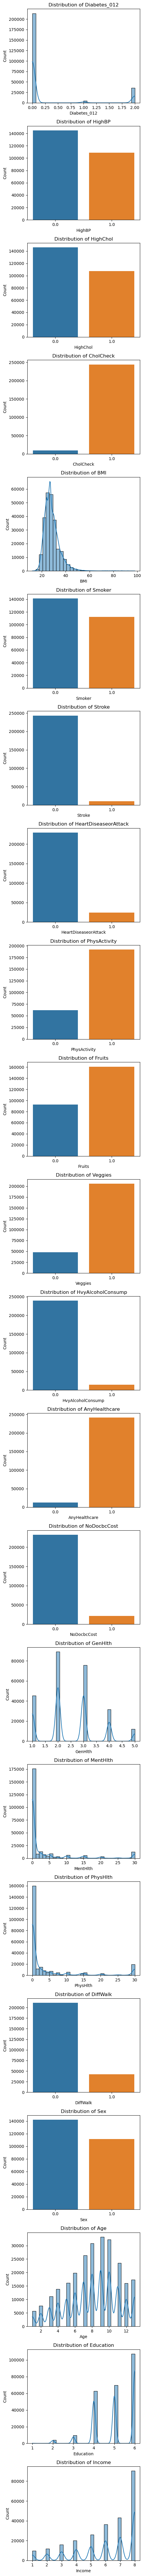

In [27]:
# Check distributions
def plot_distributions(df):
    num_columns = df.shape[1]
    fig, ax = plt.subplots(num_columns, 1, figsize=(5, num_columns * 4))

    for i, column in enumerate(df.columns):
        if column in is_binary:
            # Use a count plot for binary features
            sns.countplot(x=column, data=df, ax=ax[i])
        else:
            # Histogram for continues features
            sns.histplot(df[column], bins=30, kde=True, ax=ax[i])
        ax[i].set_title(f'Distribution of {column}')
        ax[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_distributions(data_1)


## Set up a decision tree model

In [16]:
seed = 10  # so results can be repeated

In [17]:
X = data_1.drop(dependent_variable, axis=1)  # predictors
y = data_1[dependent_variable]  # dependent variable


In [18]:
# Separate data so some is used for training, the rest or used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [19]:
# Set up the decision tree classifier and fit
clf = DecisionTreeClassifier(random_state=seed)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [20]:
# Check in-sample results

y_pred = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))


Accuracy: 0.9932838615578682
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    171100
         1.0       0.99      0.94      0.97      3706
         2.0       1.00      0.96      0.98     28138

    accuracy                           0.99    202944
   macro avg       0.99      0.97      0.98    202944
weighted avg       0.99      0.99      0.99    202944



In [21]:
# Check out of sample results

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.765964995269631
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     42603
         1.0       0.03      0.04      0.03       925
         2.0       0.29      0.31      0.30      7208

    accuracy                           0.77     50736
   macro avg       0.40      0.40      0.40     50736
weighted avg       0.78      0.77      0.77     50736



## Comment on results

The model is not suitable and overfits the data. The insample results show excellent precision and recall, while the out of sample shows very low precision for pre diabetic and diabetic categories (3% and 30% respectively)

Overal accuracy is inflated because the data is unbalanced. There are many cases of non diabetics which is easier for the model to predict.

# Confusion Matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm)

,0,1,2
0,36588,916,5099
1,640,32,253
2,4677,267,2264
